
# Lecture 2: Understanding and Presenting Data (Completed version)

**Overview**

You can't analyze what you don't understand. Today we'll discuss:

- Different types of data.

- How to visualize data effectively.

<hr style="border: 1px dotted #bbb;">

ℹ️ **Note:** 

In this lecture, we focus on **quantitative variables** (numbers such as income, years of schooling, GDP).  

We will discuss **qualitative (categorical) data** — like gender, occupation, or survey responses — in a later lecture.

---



## 📦  Required libraries

- [`wooldridge`](https://github.com/spring-haru/wooldridge) : for getting the [Wooldridge data sets](http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html).

- [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/) : for data visualization.

In [16]:
# Let's install and import the required libraries together!
!pip install wooldridge pandas numpy matplotlib seaborn

import wooldridge as wr
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


---

## Part A — Major Types of Data in Econometrics 🔍

- **Time series** — one unit over many time periods  (indexed by time)

  *Example: U.S. quarterly GDP 2001–2025.* 
  - Unit: U.S. (N = 1)
  - Time: quarters (T = 4*25 = 100)

- **Cross-sectional** — many units at one point in time  (indexed by individual)

  *Example: incomes of 500 people in 2024.* 
  - Unit: person (N = 500)
  - Time: 2024 (T = 1)

- **Cross-sectional (pooled)** — Several snapshots (cross-sections) from different years, but not necessarily the same individuals each time. (e.g. you stack different surveys across years. You can add a year variable, but you don’t explicitly re-observe the same individuals.)

  *Example: 500 households surveyed in 2020, and (possibly different) 500 in 2024.*
  - Unit: household (500 in each year, 1000 total)
  - Usually include a time-dimension variable to indicate the period.
  - Note: individuals are not *explicitly* tracked across time, unlike in panel data.

- **Panel (longitudinal)** — many units over time  (indexed by both individual and time)

  *Example: incomes of 500 people tracked 2015–2025.* 
  - Unit: person (N = 500)
  - Time: years (T = 11)

  <img src="data.png" alt="data" width="60%">




---


## Part B — Identify Data Types &  Using the Wooldridge Econometrics Datasets in Python

Professor Wooldridge’s textbook datasets are available directly in Python through the [`wooldridge`](https://github.com/spring-haru/wooldridge) package.  

These are widely used in econometrics courses for practice and replication.

<hr style="border: 1px dotted #bbb;">

#### 📥 Example: Import a dataset using `wooldridge`
```python
import wooldridge as wr

# Load the dataset
df = wr.data("<dataset_name>")

# Preview the first few rows
df.head()
```

> 💡 **Tips:**  
>
> - Replace "<dataset_name>" with the name of any dataset from Wooldridge’s collection.
>
> - Run `wr.data()` allow you to see a full list of available datasets (or visit the [Wooldridge datasets list](http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html) **please use lowercase letters for the dataset names!!**).
>
> - Using `wr.data(<dataset_name>, description=True)` gives a summary of the dataset.

<hr style="border: 1px dotted #bbb;">

#### **Ex. Campus Crime Data**

##### **Step 0. Inspecting the dataset summary**

In [17]:
# Look at the summary of a specific dataset

# For example, let's use the "campus" dataset from Wooldridge's collection
# 
wr.data('campus', description=True)

name of dataset: campus
no of variables: 7
no of observations: 97

+----------+-----------------------+
| variable | label                 |
+----------+-----------------------+
| enroll   | total enrollment      |
| priv     | =1 if private college |
| police   | employed officers     |
| crime    | total campus crimes   |
| lcrime   | log(crime)            |
| lenroll  | log(enroll)           |
| lpolice  | log(police)           |
+----------+-----------------------+

These data were collected by Daniel Martin, a former MSU
undergraduate, for a final project. They come from the FBI Uniform
Crime Reports and are for the year 1992.


<hr style="border: 1px dotted #bbb;">

##### **Step 2. Loading the data**

In [18]:
# Load the dataset campus

campus_ts_df_raw = wr.data('campus') 
campus_ts_df_raw.head()  # Preview the first few rows of the dataset

,enroll,priv,police,crime,lcrime,lenroll,lpolice
0,21836.0,0,24,446,6.100319,9.991315,3.178054
1,6485.0,0,13,1,0.000000,8.777247,2.564949
2,2123.0,0,3,1,0.000000,7.660585,1.098612
3,8240.0,0,17,121,4.795791,9.016756,2.833213
4,19793.0,0,30,470,6.152733,9.893084,3.401197


<hr style="border: 1px dotted #bbb;">

##### **Step 3. Cleaning the data**


In [19]:
# Let's clean up the data a bit and focus on the variable(s) we are interested in.
# For this example, let's focus on 'police'(number of employed police officers) and 'crime' (total campus crimes)

campus_ts_df= campus_ts_df_raw[['police', 'crime']]

<hr style="border: 1px dotted #bbb;">

##### **Step 4. Descriptive statistics**

In [20]:
# Compute the descriptive statistics for the selected variables

campus_ts_df.describe().T

,count,mean,std,min,25%,50%,75%,max
police,97.0,20.494845,15.630581,1.0,9.0,16.0,27.0,74.0
crime,97.0,394.453608,460.783866,1.0,85.0,187.0,491.0,2052.0


> 💡 **Tips:**  
>
> Recall the skills you learnt from Lecture 1 on how to inspect and clean data.
>
> They can all be applied here as well!

<hr style="border: 1px dotted #bbb;">

##### **Step 5. Visualizing the data**

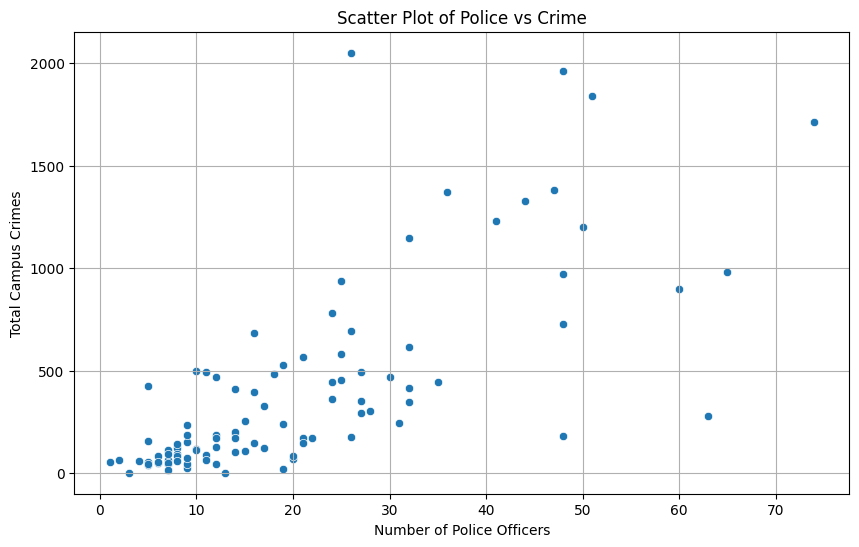

In [21]:
# Plot the scatter plot to visualize the relationship between police and crime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=campus_ts_df, x='police', y='crime')
plt.title('Scatter Plot of Police vs Crime')
plt.xlabel('Number of Police Officers')
plt.ylabel('Total Campus Crimes')
plt.grid(True)
plt.show()

<hr style="border: 1px dotted #bbb;">

##### **Preview: Adding a Best-Fit Line**

- Scatter plots help us see the **relationship between two variables**.  

- Sometimes, it’s helpful to add a **straight line** that shows the overall pattern.  

- In Python, we can do this easily with `sns.lmplot()`.  

    - ⚠️ This function actually fits a **regression line** under the hood —  but for now, just think of it as a tool that draws a **best-fit line** through the cloud of points.  

> 💡 Next class, we’ll formally cover **regression analysis**.

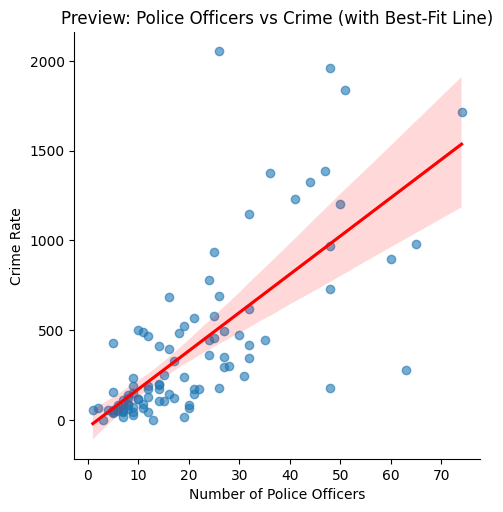

In [22]:

# Scatter plot of police officers vs crime, with a best-fit line
sns.lmplot(x="police", y="crime", data=campus_ts_df,
           scatter_kws={"alpha":0.6}, line_kws={"color":"red"})

plt.title("Preview: Police Officers vs Crime (with Best-Fit Line)")
plt.xlabel("Number of Police Officers")
plt.ylabel("Crime Rate")
plt.show()

##### ⚠️ **Correlation does not equal Causation** 🧠🧠🧠

The scatter plot with a best-fit line seems to suggest that **campuses with more police officers also report more crimes**.  
At first glance, you might be tempted to conclude:  
> “Having more campus police causes more crime.”  

⚠️ But remember: **correlation does not equal causation**.  

There are other possible explanations:  
- Larger campuses tend to have **more students**, which naturally leads to both more police **and** more reported crimes.  
- Campuses with higher crime rates may choose to **hire more police officers** in response.  
- Other factors (e.g., urban vs rural location) could influence both crime levels and police staffing.  

> 💡 This is exactly why econometrics emphasizes the difference between a **simple relationship** and a **causal effect**.  
> In the next lecture, we’ll begin learning how **regression** helps us think more carefully about these issues.

---


## Part C —  More on: Choosing the Right Visualization 🎨

The **best way to visualize data** depends on both:  
1. the **story you want to tell**, and  
2. the **type of data you have** (cross-sectional, time series, or panel).

<hr style="border: 1px dotted #bbb;">

#### Common Goals and Good Plot Choices

- 📈 **Trends over time (time series data)** → *Line plot*  
- 📊 **Comparing categories (cross-sectional data)** → *Bar chart*  
- 🧮 **Distribution of a single variable** → *Histogram* or *Box plot*  
- 🔗 **Relationship between two variables (cross-sectional)** → *Scatter plot*  
- 🌈 **Changes over time for multiple groups (panel or time series)** → *Stacked area chart*  
- 🪞 **Distribution across categories (cross-sectional or panel)** → *Faceted histogram* (one plot per group)

<hr style="border: 1px dotted #bbb;">

#### 🛠️ How to Make These Plots

The good news is that almost all of these visualizations can be created using  [`matplotlib`](https://matplotlib.org/stable/gallery/index.html) and [`seaborn`](https://seaborn.pydata.org/examples/index.html). 🎉

- `matplotlib` → the foundation library for plotting in Python  

- `seaborn` → built on top of matplotlib, with cleaner syntax and nicer defaults

👉 **Next step for you (Optional):**  

Try exploring both libraries and experiment with creating line plots, bar charts, histograms, scatter plots, and more.  

Practice is the best way to get comfortable!

---


## References & Acknowledgments

- J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach, Cengage Learning, 6th edition.

- This teaching material was prepared with the assistance of **OpenAI's ChatGPT (GPT-5)**.

---

**End of lecture notebook.**